# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [5]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as nn
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [8]:
data=image_dataset_from_directory(
    directory='/content/drive/MyDrive/data',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear'
    )

Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [10]:
data_iterator=data.as_numpy_iterator()

In [11]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

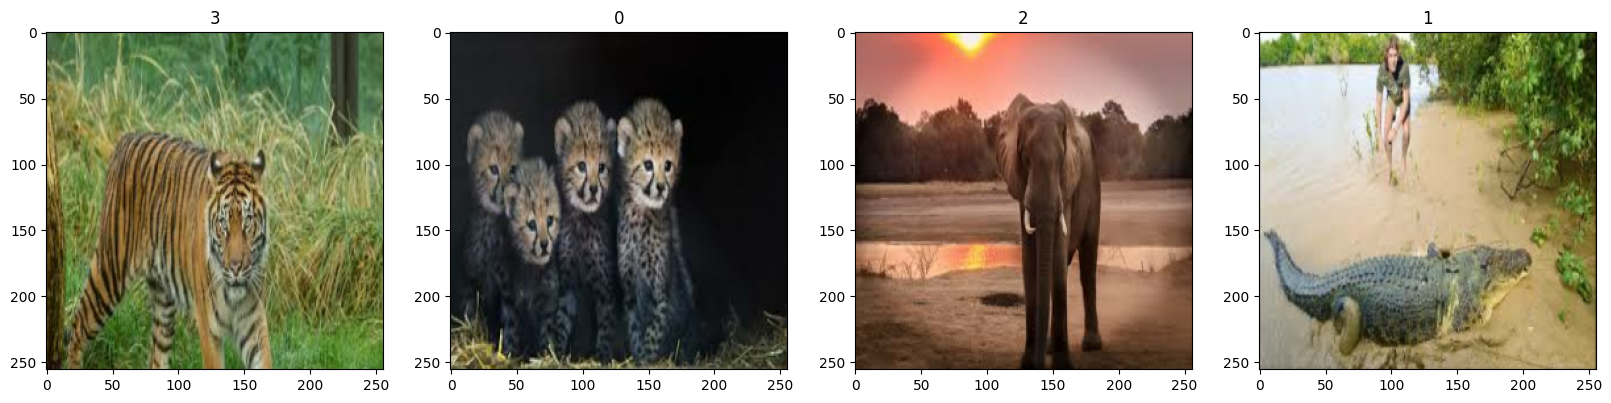

In [14]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [15]:
data=data.map(lambda x,y: (x/255,y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [17]:
#Your code here
train_set = data.take(tf.cast(len(data)*0.9,tf.int64))
test_set = data.skip(tf.cast(len(data)*0.9,tf.int64))

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [24]:
model=tf.keras.Sequential([
    nn.Conv2D(16,(3,3),activation='relu',input_shape=(256,256,3)),
    nn.MaxPool2D(),
    nn.Conv2D(32,(3,3),activation='relu'),
    nn.MaxPool2D(),
    nn.Conv2D(64,(3,3),activation='relu'),
    nn.MaxPool2D(),
    nn.Flatten(),
    nn.Dense(256,activation='relu'),
    nn.Dense(4,activation='softmax')
])

**Q.6** Compile your model

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [26]:
model.fit(train_set,epochs=10)

Epoch 1/10
46/46 [==============================] - 163s 4s/step - loss: 1.4378 - accuracy: 0.3404
Epoch 2/10
46/46 [==============================] - 13s 254ms/step - loss: 1.1337 - accuracy: 0.5340
Epoch 3/10
46/46 [==============================] - 14s 276ms/step - loss: 0.8229 - accuracy: 0.6902
Epoch 4/10
46/46 [==============================] - 13s 231ms/step - loss: 0.5379 - accuracy: 0.8132
Epoch 5/10
46/46 [==============================] - 15s 275ms/step - loss: 0.2952 - accuracy: 0.8961
Epoch 6/10
46/46 [==============================] - 13s 240ms/step - loss: 0.1879 - accuracy: 0.9402
Epoch 7/10
46/46 [==============================] - 13s 252ms/step - loss: 0.1561 - accuracy: 0.9497
Epoch 8/10
46/46 [==============================] - 13s 252ms/step - loss: 0.0520 - accuracy: 0.9871
Epoch 9/10
46/46 [==============================] - 13s 253ms/step - loss: 0.0364 - accuracy: 0.9885
Epoch 10/10
46/46 [==============================] - 13s 246ms/step - loss: 0.0212 - accuracy

**Q.8** Test your code with test set

In [27]:
loss,accuracy=model.evaluate(test_set)

6/6 [==============================] - 13s 109ms/step - loss: 0.0702 - accuracy: 0.9731


In [28]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.9731183052062988


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**